<a href="https://colab.research.google.com/github/ArvindDs/Projects/blob/main/Project_15_NLP_9_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

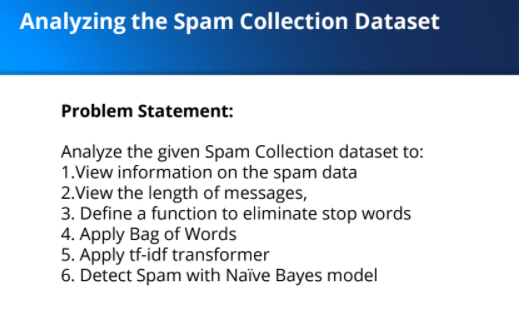

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SpamCollection',sep='\t',names=['response','message'])

In [ ]:
df.head()

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# view morw information about the spam data 
df.describe()  

,response,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# view response using groupby method and describe method
df.groupby('response').describe()

message                                                               
           count unique                                                top freq
response                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    653  Please call our customer service representativ...    4

In [ ]:
# verify length of the messages and also add it also as a new column(feature)
df['length']=df['message'].apply(len)

In [ ]:
# view first 5 messages with length
df.head()

,response,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# define a function to ger rid of stopwords(me,yours,ours etc) present in the messages.
def message_text(mess):
  # check characters to seee if there are punctuations
  no_punctuation=[char for char in mess if char not in  string.punctuation]
  # now from the sentence
  no_punctuation= ''.join(no_punctuation)
  # now eliminate any stopwords
  return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]


In [ ]:
import nltk
nltk.download('stopwords')
  
 
# verify that function is  working
df['message'].head(5).apply(message_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
# start text processing with vectoriser
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# bag of words by applying the function and fit the data (message )into it
bag_of_words_transformer=CountVectorizer(analyzer=message_text).fit(df['message'])



In [ ]:
# print  number words stored in the vocubluary_attribute
print(bag_of_words_transformer.vocabulary_)

{'Go': 2060, 'jurong': 7555, 'point': 8917, 'crazy': 5769, 'Available': 1110, 'bugis': 5218, 'n': 8336, 'great': 6937, 'world': 11163, 'la': 7668, 'e': 6217, 'buffet': 5217, 'Cine': 1483, 'got': 6906, 'amore': 4653, 'wat': 10965, 'Ok': 3064, 'lar': 7701, 'Joking': 2451, 'wif': 11072, 'u': 10698, 'oni': 8590, 'Free': 1941, 'entry': 6331, '2': 423, 'wkly': 11123, 'comp': 5619, 'win': 11084, 'FA': 1833, 'Cup': 1551, 'final': 6557, 'tkts': 10512, '21st': 443, 'May': 2804, '2005': 430, 'Text': 3953, '87121': 871, 'receive': 9252, 'questionstd': 9159, 'txt': 10686, 'rateTCs': 9200, 'apply': 4731, '08452810075over18s': 73, 'U': 4068, 'dun': 6204, 'say': 9554, 'early': 6222, 'hor': 7186, 'c': 5261, 'already': 4629, 'Nah': 2948, 'dont': 6123, 'think': 10433, 'goes': 6877, 'usf': 10799, 'lives': 7842, 'around': 4777, 'though': 10450, 'FreeMsg': 1943, 'Hey': 2222, 'darling': 5864, '3': 543, 'weeks': 11011, 'word': 11150, 'back': 4893, 'Id': 2346, 'like': 7800, 'fun': 6755, 'still': 10093, 'Tb': 3

In [ ]:
# print Length of words stored in the vocubluary_attribute
print(len(bag_of_words_transformer.vocabulary_))

11425


In [ ]:
# store bag of words for messages using transform method
message_bagofwords=bag_of_words_transformer.transform(df['message'])

In [ ]:
# aplly tfidf transformer and fit the bag of words into it(transfrmed version)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bagofwords)

In [ ]:
# print shape of the  tfidf
message_tfidf=tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(5572, 11425)


In [ ]:
# choose Naive Bayes model to detect thespam and fit the tfidf datainto it
from sklearn.naive_bayes import MultinomialNB
Spam_detect_model=MultinomialNB().fit(message_tfidf,df['response'])


In [ ]:
# check model for the predicted and expected value say for message 2 and message 5
message=df['message'][2]
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)
print('predicted',Spam_detect_model.predict(tfidf)[0])
print('expected',df.response[2])

predicted spam
expected spam
